In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [26]:
df.drop("Unnamed: 32",axis=1,inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df = df[['diagnosis', 'radius_mean','concave points_worst','concave points_mean','area_mean','compactness_mean', 'concavity_mean']]

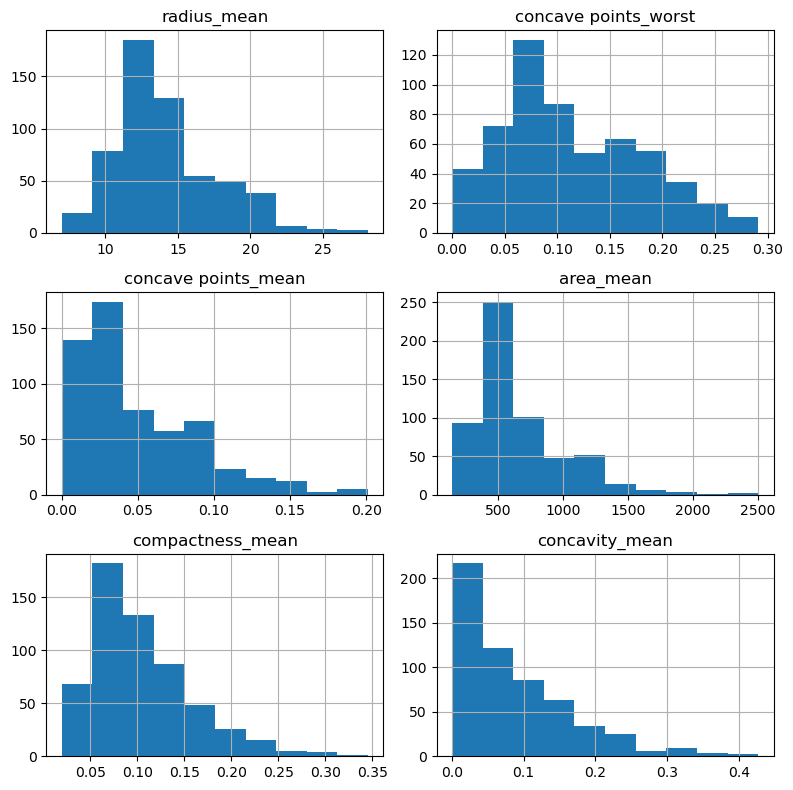

In [28]:
df.hist(bins=10,figsize=(8,8))
plt.tight_layout()
plt.show()

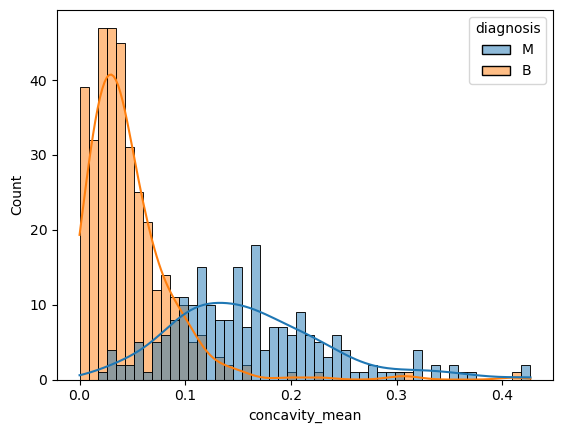

In [29]:
import seaborn as sns
sns.histplot(data=df,x="concavity_mean",hue="diagnosis",kde=True,bins=50)
plt.show()

In [30]:
label = LabelEncoder()
df["diagnosis"] = label.fit_transform(df["diagnosis"])

In [31]:
df["diagnosis"].unique()

array([1, 0])

In [32]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [35]:
svm_linear = SVC(kernel="linear",C=1)
svm_linear.fit(X_train_scaled,y_train)

SVC(C=1, kernel='linear')

In [36]:
svm_rbf = SVC(kernel="rbf",C=1,gamma=0.5)
svm_rbf.fit(X_train_scaled,y_train)

SVC(C=1, gamma=0.5)

In [44]:
param_grid = {
    "C": [0.1,1,10,100],
    "gamma": [0.01,0.1,1,10]
}
grid = GridSearchCV(SVC(kernel="rbf"),param_grid,cv=5)
grid.fit(X_train_scaled,y_train)
print("best params", grid.best_params_)
print("best_score", grid.best_score_)

best params {'C': 100, 'gamma': 1}
best_score 0.9422468354430379


In [46]:
best_svm = grid.best_estimator_
score = cross_val_score(best_svm,X_train_scaled,y_train,cv=5)

In [49]:
print("score",score.max())

score 0.9875


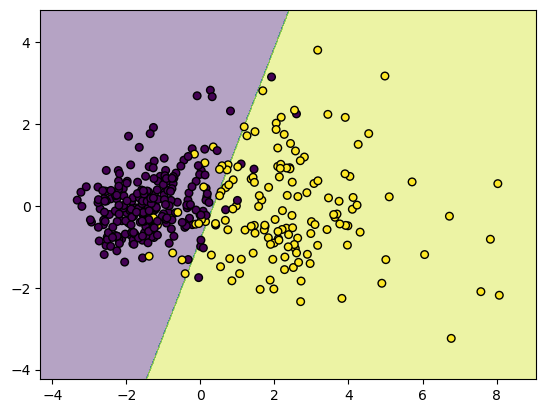

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_decision_boundary(model, X, y):
  
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    
    h = 0.02
    
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    

    grid_2d = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid_2d)
    
   
    Z = model.predict(grid_original)
    Z = Z.reshape(xx.shape)  
    
    plt.contourf(xx, yy, Z, alpha=0.4)  
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=30, edgecolor="k")
    plt.show()


plot_decision_boundary(svm_linear, X_train_scaled, y_train)